Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [162]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [163]:
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [164]:
from sklearn.preprocessing import PolynomialFeatures

# Vaš kôd ovdje
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)

phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [165]:
from numpy import linalg

# Vaš kôd ovdje

w = np.dot(np.dot(linalg.inv(np.dot(np.transpose(phi), phi)), np.transpose(phi)), y)
print('Prvi način:', w.transpose())

w = np.dot(linalg.pinv(phi), y)
print('Drugi način:', w)

Prvi način: [2.2        0.45714286]
Drugi način: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [166]:
from sklearn.metrics import mean_squared_error

# Vaš kôd ovdje

h = np.dot(phi, w)
print(h)

mserr = mean_squared_error(y, h)
print('Srednja kvadratna pogreska je jednaka: {}', mserr)

[2.2        2.65714286 3.11428571 4.02857143]
Srednja kvadratna pogreska je jednaka: {} 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [167]:
from numpy.linalg import LinAlgError

# Vaš kôd ovdje

try:
    np.dot(linalg.inv(phi), y)
except LinAlgError:
    print('Uistinu nam treba pseudoinverz. Ovaj pokusaj puca.')

Uistinu nam treba pseudoinverz. Ovaj pokusaj puca.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [168]:
from sklearn.linear_model import LinearRegression

# Vaš kôd ovdje

linearReg = LinearRegression().fit(phi, y)
w2 = np.array([linearReg.intercept_, linearReg.coef_[1]])
print('Nova težina: ', w2)
print('Stara težina: ', w)

h2 = linearReg.predict(phi)
mserr2 = mean_squared_error(y, h2)
print('Nova greška: ', mserr2)

print('Greške su jednake: ', mserr == mserr2)

Nova težina:  [2.2        0.45714286]
Stara težina:  [2.2        0.45714286]
Nova greška:  2.042857142857143
Greške su jednake:  True


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [169]:
from numpy.random import normal


def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, np.size(X))


# Vaš kôd ovdje

N = 50
sigma = 200
f = lambda x: 5 + x - 2 * (x ** 2) - 5 * (x ** 3)

In [170]:
def make_instances(x1, x2, N):
    return np.array([np.array([x]) for x in np.linspace(x1, x2, N)])

In [171]:
# Vaš kôd ovdje

X_interval = make_instances(-5, 5, N)
y_interval = make_labels(X_interval.transpose(), f, sigma).transpose()

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

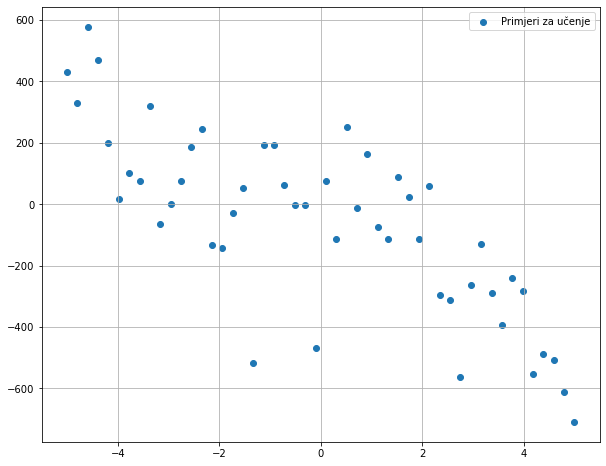

In [172]:
# Vaš kôd ovdje

plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(X_interval, y_interval, label='Primjeri za učenje')
plt.legend()
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Greška je:  27224.96662592058


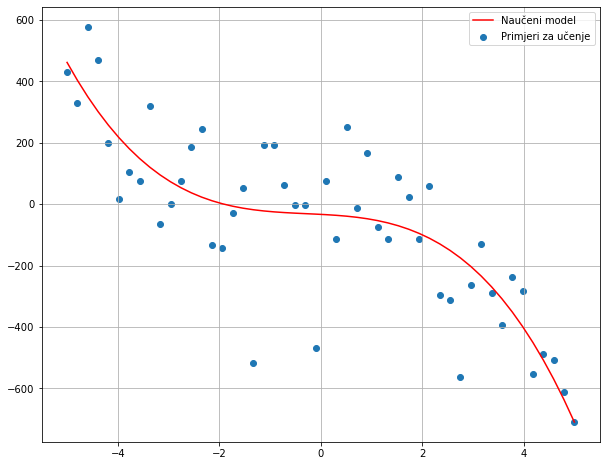

In [173]:
# Vaš kôd ovdje
from sklearn.pipeline import make_pipeline

linearReg2 = make_pipeline(PolynomialFeatures(3), LinearRegression())
linearReg2.fit(X_interval, y_interval)

prediction2 = linearReg2.predict(X_interval)

mserr3 = mean_squared_error(y_interval, prediction2)
print('Greška je: ', mserr3)

plt.figure(figsize=(10, 8))
plt.grid()
plt.scatter(X_interval, y_interval, label='Primjeri za učenje')
plt.plot(X_interval, prediction2, 'r', label='Naučeni model')
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Greška za stupanj 0 je 35593.095250170074.
Greška za stupanj 1 je 27224.96662592058.
Greška za stupanj 2 je 26753.272749342377.
Greška za stupanj 3 je 24355.25142165426.
Greška za stupanj 4 je 18250.97751290828.


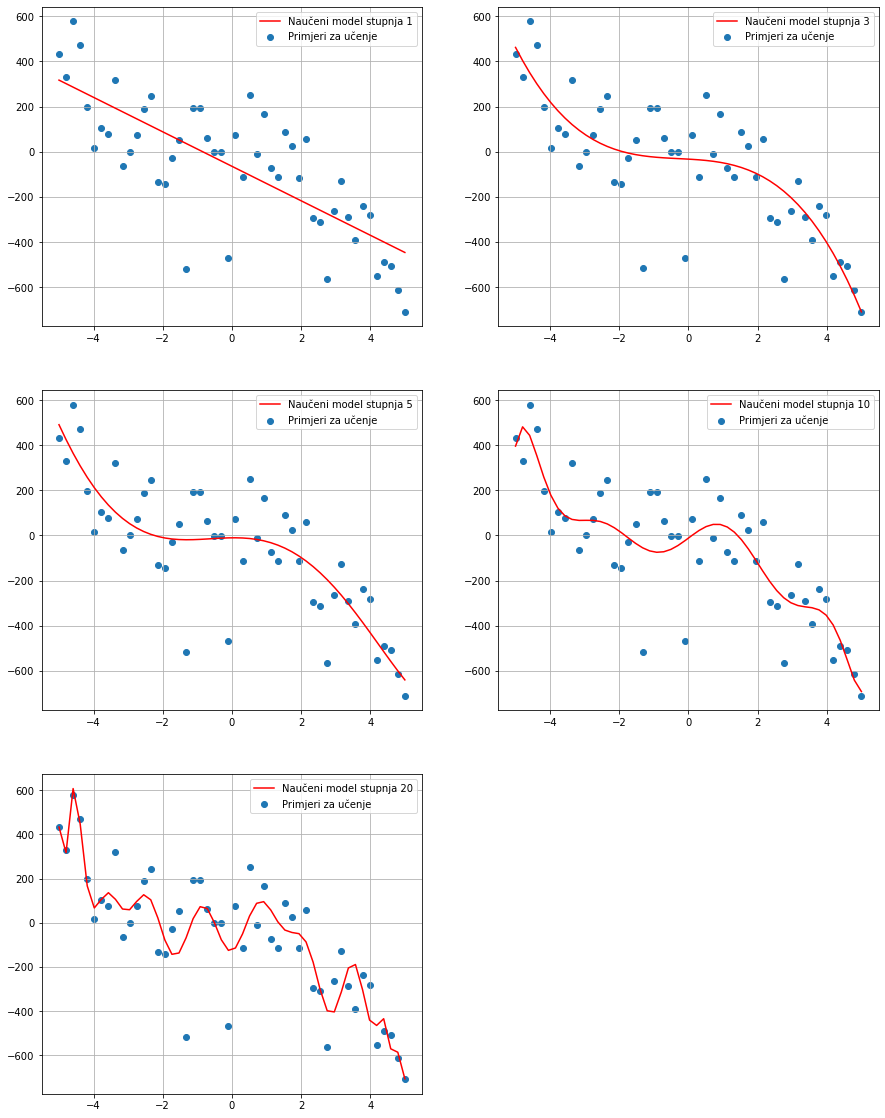

In [174]:
# Vaš kôd ovdje

d = [1, 3, 5, 10, 20]

fig = plt.figure(figsize=(15, 20))

for deg, i in zip(d, range(np.size(d))):
    currentLinReg = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    currentLinReg.fit(X_interval, y_interval)

    currentPrediction = currentLinReg.predict(X_interval)

    currentMserr = mean_squared_error(y_interval, currentPrediction)
    print('Greška za stupanj {} je {}.'.format(i, currentMserr))

    subPlot = fig.add_subplot(3, 2, i + 1)
    subPlot.scatter(X_interval, y_interval, label='Primjeri za učenje')
    subPlot.plot(X_interval, currentPrediction, 'r', label='Naučeni model stupnja {}'.format(deg))
    subPlot.legend()
    subPlot.grid()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

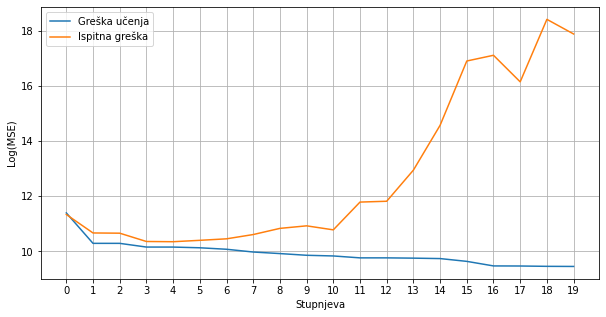

In [175]:
from sklearn.model_selection import train_test_split

# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X_interval, y_interval, train_size=0.5, random_state=1999)

train_err = []
test_err = []

min_deg = 0
max_deg = 20

d = range(min_deg, max_deg)

for deg in d:
    currentLinReg = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    currentLinReg.fit(X_train, y_train)

    currentPredictionTrain = currentLinReg.predict(X_train)
    currentPredictionTest = currentLinReg.predict(X_test)

    currentTrainMserr = mean_squared_error(y_train, currentPredictionTrain)
    currentTestMserr = mean_squared_error(y_test, currentPredictionTest)

    train_err.append(currentTrainMserr)
    test_err.append(currentTestMserr)

plt.figure(figsize=(10, 5))
plt.plot(d, np.log(train_err), label='Greška učenja')
plt.plot(d, np.log(test_err), label='Ispitna greška')

plt.xlabel('Stupnjeva')
plt.ylabel('Log(MSE)')
plt.xticks(d)
plt.legend()
plt.grid()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

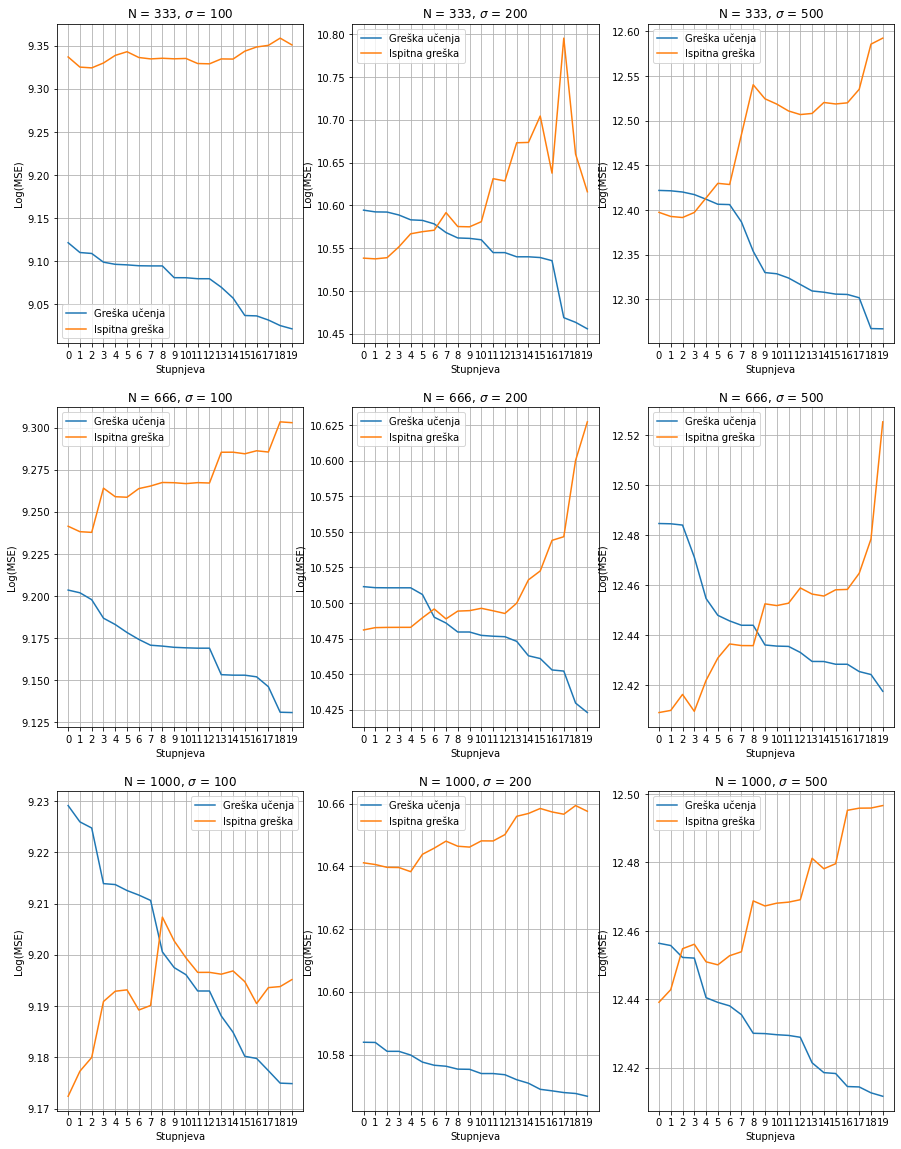

In [176]:
import math

# Vaš kôd ovdje

N_mod = [1 / 3, 2 / 3, 1]
sigma2 = [100, 200, 500]

N = 1000

X_interval2 = make_instances(-5, 5, N)

rows = np.size(N_mod)
cols = np.size(sigma2)

matrix_X_train = {}
matrix_X_test = {}
matrix_y_train = {}
matrix_y_test = {}

for size, i in zip(N_mod, range(rows)):
    for sigma, j in zip(sigma2, range(cols)):
        current_X = X_interval2.copy()
        np.random.shuffle(current_X)

        current_X = current_X[: math.floor(size * N)]
        current_y = make_labels(current_X, f, sigma).transpose()

        curr_X_train, curr_X_test, curr_y_train, curr_y_test = train_test_split(current_X, current_y, train_size=0.5,
                                                                                random_state=1999)

        matrix_X_train[i, j] = curr_X_train
        matrix_X_test[i, j] = curr_X_test
        matrix_y_train[i, j] = curr_y_train
        matrix_y_test[i, j] = curr_y_test

fig = plt.figure(figsize=(15, 20))

counter = 1
for i in range(rows):
    for j in range(cols):
        train_err = []
        test_err = []

        min_deg_2 = 0
        max_deg_2 = 20

        d2 = range(min_deg_2, max_deg_2)

        for deg in d2:
            currentLinReg = make_pipeline(PolynomialFeatures(deg), LinearRegression())
            currentLinReg.fit(matrix_X_train[i, j], matrix_y_train[i, j])

            currentPredictionTrain = currentLinReg.predict(matrix_X_train[i, j])
            currentPredictionTest = currentLinReg.predict(matrix_X_test[i, j])

            currentTrainMserr = mean_squared_error(matrix_y_train[i, j], currentPredictionTrain)
            currentTestMserr = mean_squared_error(matrix_y_test[i, j], currentPredictionTest)

            train_err.append(currentTrainMserr)
            test_err.append(currentTestMserr)

        ax = fig.add_subplot(3, 3, counter)
        ax.grid()
        ax.plot(d2, np.log(train_err), label='Greška učenja')
        ax.plot(d2, np.log(test_err), label='Ispitna greška')
        plt.xlabel('Stupnjeva')
        plt.ylabel('Log(MSE)')
        plt.xticks(d2)
        plt.legend()
        plt.title('N = {}, $\sigma$ = {}'.format(math.floor(N_mod[i] * N), sigma2[j]))
        counter += 1


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [177]:
# Vaš kôd ovdje

lambdas = [0, 1, 10]
deg = 3

phiReg = PolynomialFeatures(deg).fit_transform(X)

for current_lambda in lambdas:
    current_w = np.dot(
        np.dot(linalg.inv(np.dot(phiReg.transpose(), phiReg) + np.dot(current_lambda, np.eye(4))), phiReg.transpose()),
        y)
    print(current_w)


[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [178]:
from sklearn.linear_model import Ridge

# Vaš kôd ovdje

for current_lambda in lambdas:
    current_w_ridge = Ridge(current_lambda).fit(phiReg, y)

    current_w = [current_w_ridge.intercept_]
    current_w.extend(current_w_ridge.coef_[1:])

    print(current_w)

[4.000000000000025, -5.916666666666765, 3.375000000000053, -0.4583333333333405]
[3.0569614512471652, -0.6907936507936512, -0.2831746031746025, 0.14458049886621302]
[2.4944418431229733, -0.1589729487341474, -0.1342306653684832, 0.08156009919705873]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

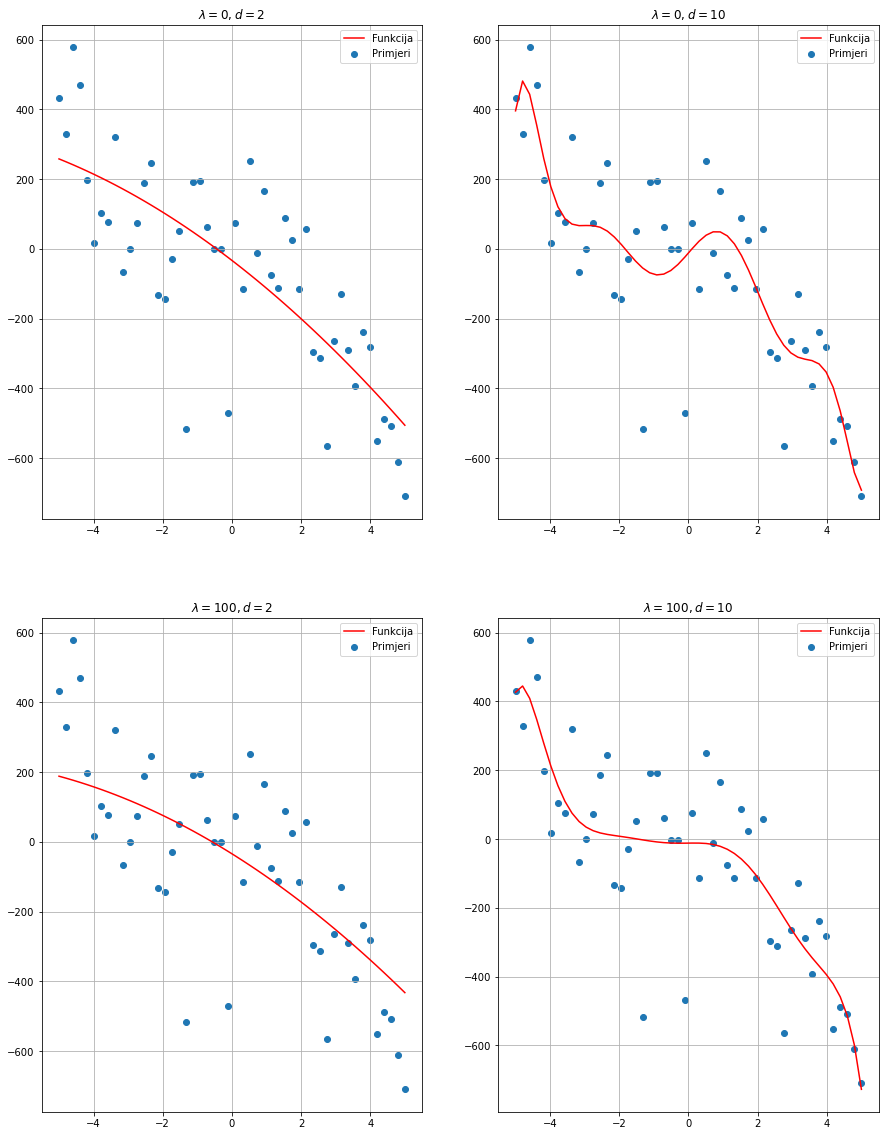

In [179]:
# Vaš kôd ovdje

lambdas = [0, 100]
degrees = [2, 10]

fig = plt.figure(figsize=(15, 20))

counter = 1
for current_lambda, i in zip(lambdas, range(np.size(lambdas))):
    for current_degree, j in zip(degrees, range(np.size(degrees))):
        currentLinReg = make_pipeline(PolynomialFeatures(current_degree), Ridge(current_lambda))
        currentLinReg.fit(X_interval, y_interval)

        currentPrediction = currentLinReg.predict(X_interval)

        ax = fig.add_subplot(2, 2, counter)
        plt.plot(X_interval, currentPrediction, 'r', label='Funkcija')
        plt.scatter(X_interval, y_interval, label='Primjeri')
        plt.grid()
        plt.legend()
        plt.title('$\lambda=%d, d=%d$' % (current_lambda, current_degree))

        counter += 1




### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


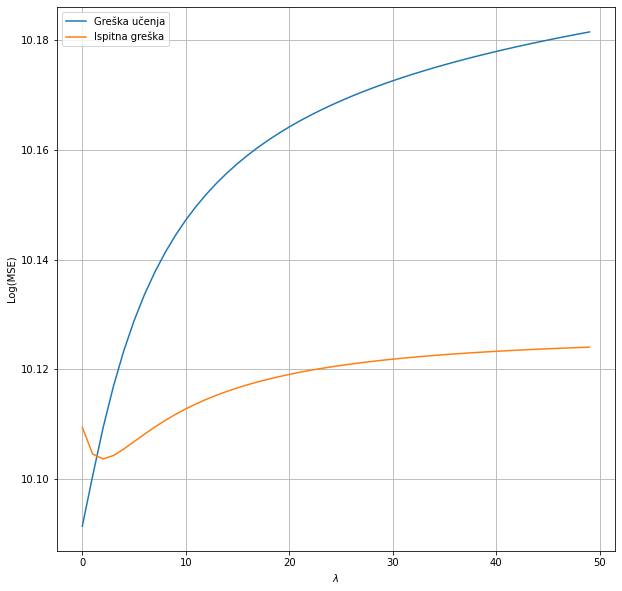

In [191]:
# Vaš kôd ovdje

d = 10
lambdas = range(0, 50)

train_err = []
test_err = []

curr_X_train, curr_X_test, curr_y_train, curr_y_test = train_test_split(X_interval, y_interval, train_size=0.5, random_state=1999)

for current_lambda in lambdas:
        currentLinReg = make_pipeline(PolynomialFeatures(d), Ridge(current_lambda))
        currentLinReg.fit(X_interval, y_interval)

        currentPredictionTrain = currentLinReg.predict(curr_X_train)
        currentPredictionTest = currentLinReg.predict(curr_X_test)

        currentTrainMserr = mean_squared_error(curr_y_train, currentPredictionTrain)
        currentTestMserr = mean_squared_error(curr_y_test, currentPredictionTest)

        train_err.append(currentTrainMserr)
        test_err.append(currentTestMserr)

plt.figure(figsize=(10,10))
plt.plot(lambdas, np.log(train_err), label='Greška učenja')
plt.plot(lambdas, np.log(test_err), label='Ispitna greška')
plt.xlabel('$\lambda$')
plt.ylabel('Log(MSE)')
plt.grid()
plt.legend()
plt.show()

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [181]:
    def nonzeroes(coef, tol=1e-6):
        return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [182]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [183]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [184]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale=500.0, size=n_data_points)
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale=2.0, size=n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score, grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale=0.5, size=n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0)
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [185]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [186]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [187]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [188]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [189]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [190]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.